In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

import os
os.listdir('../')

['.ipynb_checkpoints', 'code', 'funda_train.csv', 'sub', 'submission.csv']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../'
train = pd.read_csv(path + 'funda_train.csv')

train['year'] = train['transacted_date'].apply(lambda x : x.split('-')[0]).apply(int)
train['month'] = train['transacted_date'].apply(lambda x : x.split('-')[1]).apply(int)
train['day'] = train['transacted_date'].apply(lambda x : x.split('-')[2]).apply(int)

train['hour'] = train['transacted_time'].apply(lambda x : x.split(':')[0]).apply(int)
train['minute'] = train['transacted_time'].apply(lambda x : x.split(':')[1]).apply(int)

In [32]:
import warnings
warnings.filterwarnings('ignore')

# target
- 음수의 값도 존재 (**구매 취소 혹은 환불**)

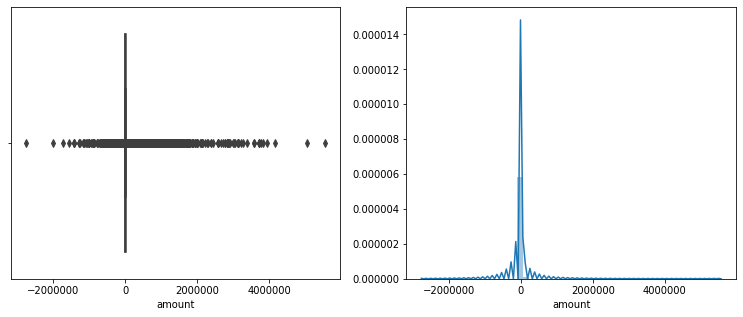

In [33]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
sns.boxplot(train.amount, ax = axs[0])
sns.distplot(train.amount, ax = axs[1])

In [63]:
train.loc[train.amount == 0, 'store_id'].value_counts()

1605    79
1932     1
Name: store_id, dtype: int64

In [66]:
train.loc[train.amount < 0, 'store_id'].value_counts()

1770    2196
1505     447
1541     403
113      262
2114     249
        ... 
427        1
1941       1
1351       1
1836       1
1659       1
Name: store_id, Length: 1965, dtype: int64

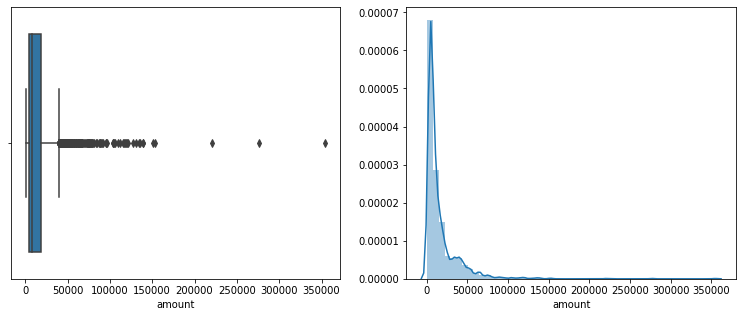

In [37]:
#shop_id별 평균 target
aa = train.groupby('store_id')['amount'].mean()

fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
sns.boxplot(aa, ax = axs[0])
sns.distplot(aa, ax = axs[1])

# card_id

In [21]:
print('전체 card_id 개수 : ', len(train.card_id.unique()))

전체 card_id 개수 :  3950001


card_id 개수가 엄청 다양하다

## 각 store별로 거래가 일어난 card_id 개수 

In [7]:
aa = train.groupby('store_id')['card_id'].nunique()
aa.describe()

count    1967.000000
mean     2068.089476
std      1763.058015
min        20.000000
25%       630.000000
50%      1453.000000
75%      3110.000000
max      8453.000000
Name: card_id, dtype: float64

대부분이 3000개 이하의 card_id와만 거래

C:\Users\wjssm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


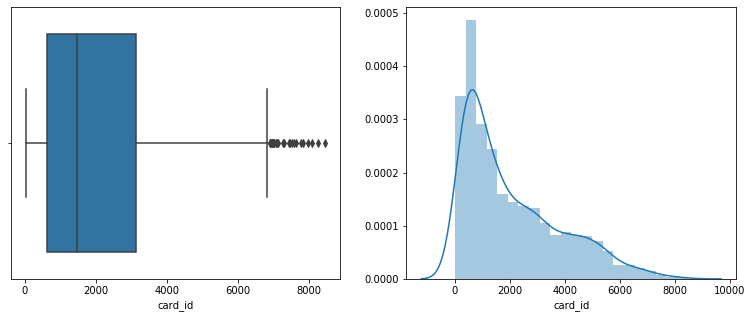

In [20]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
sns.boxplot(aa, ax = axs[0])
sns.distplot(aa, ax = axs[1])

가장 많은 card_id와 거래하는 **store_id = 1330**

In [43]:
train[train.store_id == np.argmax(aa)].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute
4050735,1330,2871020,b,2016-06-01,01:47,0,NaN,한식 음식점업,6857.142857,2016,6,1,1,47
4050736,1330,2871021,e,2016-06-01,19:23,0,NaN,한식 음식점업,6714.285714,2016,6,1,19,23
4050737,1330,2871022,c,2016-06-01,20:03,0,NaN,한식 음식점업,14285.714286,2016,6,1,20,3
4050738,1330,2871023,c,2016-06-01,20:59,0,NaN,한식 음식점업,7142.857143,2016,6,1,20,59
4050739,1330,2871024,c,2016-06-01,21:00,0,NaN,한식 음식점업,8285.714286,2016,6,1,21,0


## card_id당 거래 수

In [44]:
aa = train.card_id.value_counts()
aa.describe()

count    3.950001e+06
mean     1.659902e+00
std      3.025841e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.443000e+03
Name: card_id, dtype: float64

- 75%이상이 거래 건수가 1번

C:\Users\wjssm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


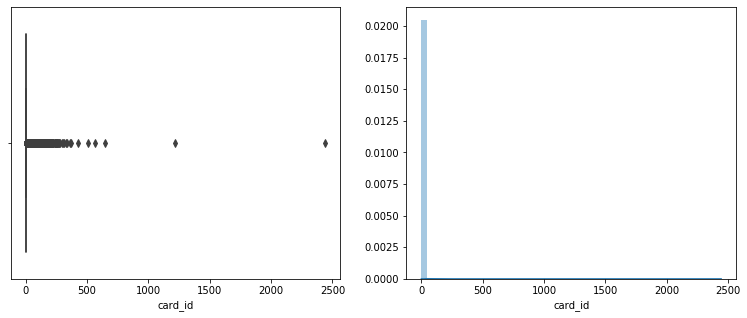

In [24]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
sns.boxplot(aa, ax = axs[0])
sns.distplot(aa, ax = axs[1])

In [47]:
#제일 많은 거래가 있었던 card_id = 380295
train[train.card_id == np.argmax(aa)].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute
5361378,1770,3820295,h,2017-10-13,12:44,0,NaN,NaN,242.857143,2017,10,13,12,44
5361379,1770,3820295,h,2017-10-13,12:44,0,NaN,NaN,-242.857143,2017,10,13,12,44
5361380,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,257.142857,2017,10,13,12,45
5361381,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,-257.142857,2017,10,13,12,45
5361382,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,271.428571,2017,10,13,12,45


In [57]:
#두번쨰로 많은 거래가 있었던 card_id = 3820350
train[train.card_id == np.argsort(aa).index[1]].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute
5362773,1770,3820350,e,2017-12-12,10:16,0,NaN,NaN,142.857143,2017,12,12,10,16
5362774,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,-142.857143,2017,12,12,10,17
5362775,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,157.142857,2017,12,12,10,17
5362776,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,-157.142857,2017,12,12,10,17
5362777,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,171.428571,2017,12,12,10,17


## card_id 당 amount(target)의 평균

In [59]:
#card_id 당 amount의 평균값
aa = train.groupby('card_id')['amount'].mean()
aa.describe()

count    3.950001e+06
mean     9.574305e+03
std      2.335178e+04
min     -2.857143e+05
25%      2.357143e+03
50%      4.400000e+03
75%      8.571429e+03
max      3.955714e+06
Name: amount, dtype: float64

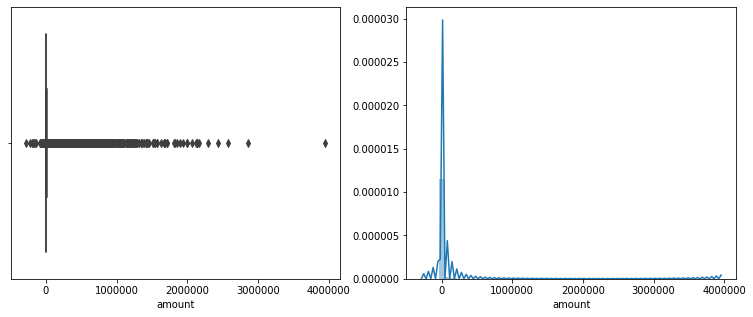

In [60]:
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
sns.boxplot(aa, ax = axs[0])
sns.distplot(aa, ax = axs[1])

# card_company

In [67]:
print('card_company 개수 : ', len(train.card_company.unique()))

card_company 개수 :  8


## store_id 당 거래한 카드사

In [70]:
aa = train.groupby('store_id')['card_company'].nunique()
aa.value_counts()

8    1756
7     193
4      13
6       2
1       2
3       1
Name: card_company, dtype: int64

# installment term
- 할부 개월 수( 포인트 사용 시 (60개월 + 실제할부개월)을 할부개월수에 기재한다. )

In [3]:
#point 사용 여부
train['point_use'] = 0
train.loc[train['installment_term'] >= 60, 'point_use'] = 1

#실제 할부 기간
train.loc[train.point_use == 1, 'installment_term'] = train.loc[train.point_use == 1, 'installment_term'] - 60

#할부 여부
train['installment'] = 0
train.loc[train.installment_term > 0, 'installment'] = 1

In [83]:
train.installment_term.value_counts()

0     6328922
3      134717
2       42101
5       23757
6       10792
10       6241
4        4816
12       2703
7         553
8         413
24        404
9         349
18        332
20        199
15        130
11         47
30         43
36         36
16         23
14         12
23          8
19          4
13          3
22          3
35          2
33          2
17          1
Name: installment_term, dtype: int64

# type_of_business

In [86]:
print('type of business 개수 : ', len(train.type_of_business.unique()))

type of business 개수 :  146


In [87]:
train.type_of_business.value_counts().index

Index(['한식 음식점업', '두발 미용업', '의복 소매업', '기타 주점업', '치킨 전문점', '일식 음식점업',
       '서양식 음식점업', '간이음식 포장 판매 전문점', '비알코올 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       ...
       '경영 컨설팅업', '간판 및 광고물 제조업', '생활용 유리ㆍ요업ㆍ목재ㆍ금속 제품 및 날붙이 도매업', '육류 도매업',
       '통신·방송장비 및 부품 도매업', '곡물 및 기타 식량작물 재배업', '주방용품 및 가정용 유리, 요업 제품 소매업',
       '배전반 및 전기 자동제어반 제조업', '그 외 기타 생활용품 도매업', '신선식품 및 단순 가공식품 도매업'],
      dtype='object', length=145)

In [4]:
train['business_type1'] = train.type_of_business.apply(lambda x : str(x).split(' ')[-1])
train.head(3)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업


In [99]:
train.business_type1.value_counts()

nan       3952609
음식점업      1013476
소매업        553359
미용업        217618
전문점        163407
주점업        102413
운영업         87284
도매업         84992
음료점업        72720
서비스업        47527
교육기관        33446
학원          28659
판매업         22360
수리업         19436
예술학원        18244
세탁업         17368
제조업         14873
교습학원        14067
세차업          9643
여관업          9518
이용업          9364
외국어학원        9231
제과점업         8943
촬영업          7593
택배업          6761
슈퍼마켓         4811
한의원          4442
임대업          3664
의원           2919
병원           2668
편의점          2430
여행사업         1983
직업훈련학원       1651
복제업          1383
공사업          1177
연구개발업        1157
마사지업         1156
예식장업         1061
컨설팅업          631
재배업           569
Name: business_type1, dtype: int64

In [104]:
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

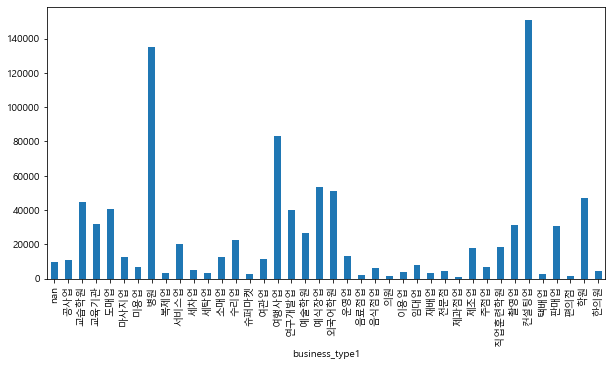

In [105]:
plt.figure(figsize = (10,5))
train.groupby('business_type1')['amount'].mean().plot.bar()

# region

In [109]:
print('region 개수 : ', len(train.region.unique()))

train.region.value_counts().head()

region 개수 :  181


경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
Name: region, dtype: int64

In [5]:
train['city1'] = train.region[~train.region.isnull()].apply(lambda x : x.split(' ')[0])
train['city2'] = train.region[~train.region.isnull()].apply(lambda x : x.split(' ')[1])

In [114]:
train.city1.value_counts()

경기    968836
서울    704437
경남    406190
부산    359042
경북    262338
충북    239796
충남    217040
대구    208424
인천    192439
강원    169791
전북    143514
대전    142478
울산    124640
전남    121978
광주    118015
제주    114671
세종     20218
Name: city1, dtype: int64

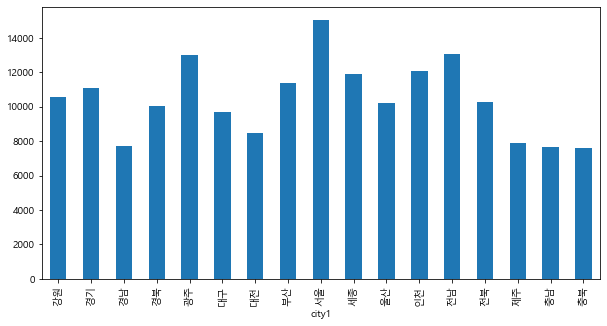

In [116]:
plt.figure(figsize = (10,5))
train.groupby('city1')['amount'].mean().plot.bar()

In [15]:
print(train.shape)
train.head()

(6556613, 19)


,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN


# transacted_date

In [17]:
print('전체 거래 기간 {}에서 {}까지'.format(train.transacted_date.min(), train.transacted_date.max()))

전체 거래 기간 2016-06-01에서 2019-02-28까지


In [24]:
train['transacted_date'] = pd.to_datetime(train['transacted_date'])

0         2016-06-01
1         2016-06-01
2         2016-06-01
3         2016-06-01
4         2016-06-02
             ...    
6556608   2019-02-28
6556609   2019-02-28
6556610   2019-02-28
6556611   2019-02-28
6556612   2019-02-28
Name: transacted_date, Length: 6556613, dtype: datetime64[ns]

In [29]:
train['transacted_time'] = pd.to_datetime(train['transacted_time'], format='%H:%M').dt.time

In [32]:
train.to_pickle('../train2.pkl')